<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Dynamic systems: 3. Continuity 
## Reaction equation in 1D
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

----
In this notebook, we solve a simple **transient reaction equation** in one dimension,
using different numerical methods.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

----
## Theoretical model

The simple one-dimensional `transient reaction equation` reads:
$$
\fbox{$
\frac{\partial c(x,t)}{\partial t} - R = 0
$}
$$

As reaction $R$, we define radiogenic decay:
$$
c(t) = c_0 e^{\displaystyle -\lambda t}
$$
with
$t$ [s] time, $\lambda$ [1/s] the decay constant, and $c_0$ [mol/m$^3$] an initial concentration.

The reaction term $R$ is simply the temporal derivative of $c$:
$$
R = -\lambda c
$$

Then the transient reaction equation in 1D follows as:
$$
\frac{\partial c}{\partial t} + \lambda c = 0
$$

----
## Gaussian function

As initial condition, we again use the `Gaussian` function:
$$
c(x,t) = e^{-\frac{(x-vt-\mu)^2}{\sigma^2}}
$$
with mean $\mu$, standard deviation $\sigma$, and for completeness,
$v$ [m/s] the advection velocity.

In [2]:
def gaussian(x,v=0.,t=0.,mu=5.,sigma=1.):
    f = np.exp(-(x-v*t-mu)**2/(sigma)**2)
    return f

In [3]:
xstep = 101
x = np.linspace(0,10,xstep)

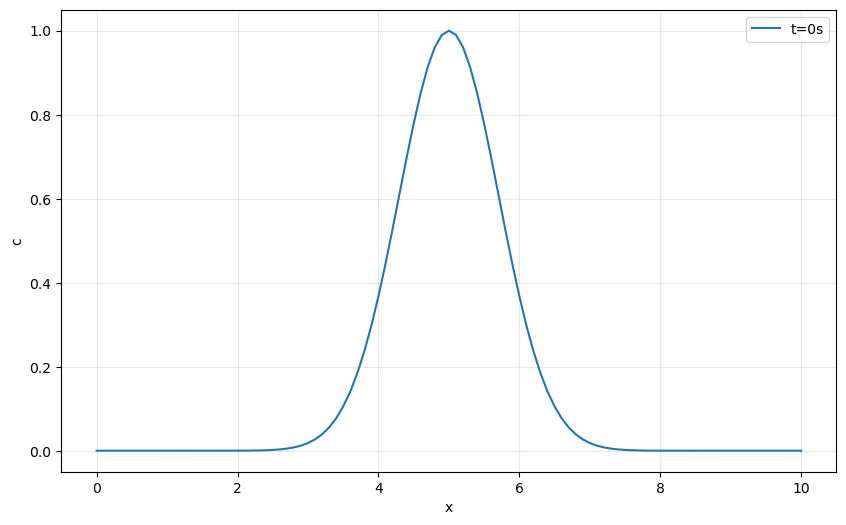

In [4]:
u0 = gaussian(x)

plt.figure(figsize=(10,6))
plt.xlabel('x')
plt.ylabel('c')
plt.grid(alpha=0.3)
plt.plot(x,u0,label='t=0s')
#plt.plot(x,gaussian(x,t=4),label='t=4s')
#plt.plot(x,gaussian(x,t=8),label='t=8s')
#plt.plot(x,gaussian(x,t=10),label='t=10s')
plt.legend()

----
## Numerical solution methods

Next, we derive several numerical methods, which can be used to solve the transient advection equation.
We first need to assign the temporal and spatial time steps, $\Delta t$ [s] and $\Delta x$ [m], 
and the velocity $c$ [m/s]:

In [5]:
dt = 0.05   # s
dx = (x.max()-x.min()) / (xstep-1)   # m
v  = 0.5  #   m/s
thalf = 4    # s
lamb = np.log(2)/thalf
print(thalf,lamb)

4 0.17328679513998632


Thus we have discretised both spatial and temporal variables:
$$
\begin{array}{rcl}
t_n &=& t_0 + n \Delta T, \quad n=0,N \\
x_i &=& x_0 + i \Delta x, \quad i=0,I
\end{array}
$$

----
## FTCS scheme (forward time centered space)

Our first scheme is called `FTCS`, forward time, centered space, thus the derivatives in the
transient advection equations are replaced by **forward differences in time** and 
**central differences is space**:
$$
\frac{c_{i}^{n+1}-c_{i}^{n}}{\Delta t}
=
-\lambda c^n_i
$$
or solved for the next time step
$$
c_{i}^{n+1}
=
c_{i}^{n} - \lambda c^n_i
$$

<img src="images/PDE_FTCS.jpg" style="height:5cm;">

We implement the FTCS method:

In [6]:
# start time
t = 0
# initial values
u = gaussian(x)

# solution
for n in range(200):
    t = t + dt
    uold = u
    for i in range(1,u.shape[0]-1):
        u[i] = uold[i] - lamb*uold[i]*dt
    if (np.abs(t-4) < dt/2):
        u04 = np.copy(u)
    elif (np.abs(t-8) < dt/2):
        u08 = np.copy(u)
    elif (np.abs(t-10) < dt/2):
        u10 = np.copy(u)

In [7]:
print(x[np.where(u0 == np.amax(u0))],u0[np.where(u0 == np.amax(u0))])
print(x[np.where(u04 == np.amax(u04))],u04[np.where(u04 == np.amax(u04))])
print(x[np.where(u08 == np.amax(u08))],u08[np.where(u08 == np.amax(u08))])
print(x[np.where(u10 == np.amax(u10))],u10[np.where(u10 == np.amax(u10))])

[5.] [1.]
[5.] [0.49849213]
[5.] [0.24849441]
[5.] [0.17544693]


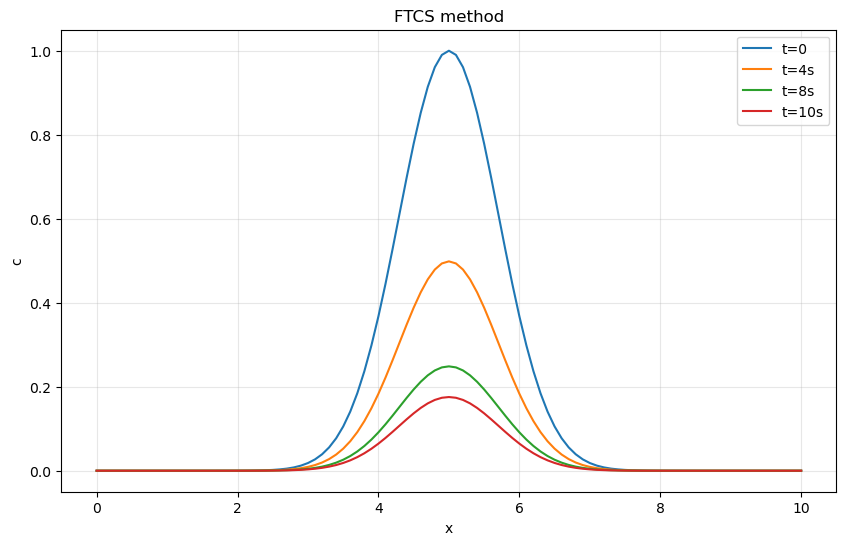

In [8]:
plt.figure(figsize=(10,6))
plt.xlabel('x')
plt.ylabel('c')
plt.grid(alpha=0.3)
plt.plot(x,u0,label='t=0')
plt.plot(x,u04,label='t=4s')
plt.plot(x,u08,label='t=8s')
plt.plot(x,u10,label='t=10s')
plt.title('FTCS method')
plt.legend()

... done